In [4]:
import pandas as pd

df = pd.read_csv("./data/dataset.csv")
print("Completed")
df.tail(5)

Completed


,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,path
14517,-0.133510,0.114787,0.042609,-0.021096,-0.109381,0.003172,-0.079485,-0.127589,0.113318,-0.035607,...,0.109290,0.009020,0.049992,-0.089613,-0.137708,-0.009196,-0.018556,0.050040,0.074625,Roger_Moore/Roger_Moore_0002.jpg
14518,-0.114260,0.081388,0.021501,0.004426,-0.121737,-0.036009,-0.052952,-0.065869,0.067422,0.022688,...,0.098820,-0.030661,0.014297,-0.069923,-0.090135,0.004498,-0.039628,0.037044,0.029908,Roger_Moore/Roger_Moore_0004.jpg
14519,-0.112008,0.098392,0.020857,-0.064378,-0.055699,-0.028455,0.001137,-0.126237,0.211053,-0.103879,...,0.055032,0.022637,-0.060624,-0.141714,-0.114851,0.120575,-0.024393,0.090257,-0.019522,Infanta_Cristina/Infanta_Cristina_0001.jpg
14520,-0.101407,0.131047,0.077450,-0.121587,-0.098095,0.074540,-0.011838,-0.090729,0.170558,-0.024899,...,0.100871,0.015723,-0.003253,-0.162624,-0.058354,0.050967,-0.054312,0.029150,0.071137,Iva_Majoli/Iva_Majoli_0002.jpg
14521,-0.146153,0.117599,0.049414,-0.088099,-0.098854,0.072104,-0.023049,-0.122974,0.155028,-0.069930,...,0.100241,-0.015645,-0.005960,-0.183655,-0.125308,0.041907,-0.058878,0.020184,0.105248,Iva_Majoli/Iva_Majoli_0001.jpg


In [5]:
features = [str(i) for i in range(1, 129)]
x = df.loc[:, features]
y = df.loc[:, ["path"]]
y.tail(5)

,path
14517,Roger_Moore/Roger_Moore_0002.jpg
14518,Roger_Moore/Roger_Moore_0004.jpg
14519,Infanta_Cristina/Infanta_Cristina_0001.jpg
14520,Iva_Majoli/Iva_Majoli_0002.jpg
14521,Iva_Majoli/Iva_Majoli_0001.jpg


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print("Estandarización de los datos - hecho")

Estandarización de los datos - hecho


Cantidad de componentes principales: 78


Text(0, 0.5, 'cumulative explained variance')

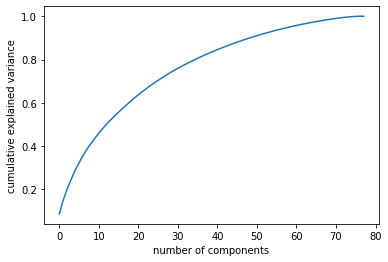

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(.99999, svd_solver ='full')
pca.fit(x_scaled)
ncomponents = len(pca.components_)
print("Cantidad de componentes principales: " + str(ncomponents))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [8]:
x_pca = pca.transform(x_scaled)
principalComponents = pd.DataFrame(data=x_pca, columns=[str(i) for i in range(1, ncomponents+1)] )
principalComponents.tail(5)

,1,2,3,4,5,6,7,8,9,10,...,69,70,71,72,73,74,75,76,77,78
14517,-3.170989,-2.996714,0.828204,-0.878196,-0.531394,-1.182663,-1.111741,0.629352,-1.366821,-1.340037,...,-0.015413,0.576224,0.301157,-0.586527,-0.515037,0.282112,0.478309,-0.118994,-0.082266,0.038409
14518,-3.371913,-1.174224,2.820729,-2.667284,-2.189126,-1.993203,-0.687664,-2.218987,-2.426848,-1.035588,...,-0.344849,0.954387,1.162301,-0.381677,0.345003,0.163142,-0.125296,-0.054198,-0.248201,0.027058
14519,4.836418,-0.802957,-1.360654,-0.806358,2.729610,-3.426629,-1.105915,-1.512204,1.639285,0.128541,...,0.504605,-0.108606,-1.622835,0.392407,-0.105938,0.393203,0.292933,-0.295693,-0.541797,0.034105
14520,4.645473,-2.690024,0.503463,2.895063,-2.805714,1.915525,-0.378131,2.963921,-2.727440,-0.479845,...,-1.321504,-0.088076,-0.221576,0.056158,-0.555941,-0.360521,-0.301659,-0.304309,-0.238013,-0.048939
14521,3.520371,-1.916094,0.728816,2.408898,-2.020900,2.722483,1.198666,4.297486,-2.326022,-0.430098,...,-0.543085,-0.205065,0.659765,0.759159,0.045432,0.013245,0.224359,-0.205067,0.297170,-0.054768


In [9]:
final_df = pd.concat([principalComponents, y], axis=1)
print("Dataset final")
final_df.tail(5)

Dataset final


,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,path
14517,-3.170989,-2.996714,0.828204,-0.878196,-0.531394,-1.182663,-1.111741,0.629352,-1.366821,-1.340037,...,0.576224,0.301157,-0.586527,-0.515037,0.282112,0.478309,-0.118994,-0.082266,0.038409,Roger_Moore/Roger_Moore_0002.jpg
14518,-3.371913,-1.174224,2.820729,-2.667284,-2.189126,-1.993203,-0.687664,-2.218987,-2.426848,-1.035588,...,0.954387,1.162301,-0.381677,0.345003,0.163142,-0.125296,-0.054198,-0.248201,0.027058,Roger_Moore/Roger_Moore_0004.jpg
14519,4.836418,-0.802957,-1.360654,-0.806358,2.729610,-3.426629,-1.105915,-1.512204,1.639285,0.128541,...,-0.108606,-1.622835,0.392407,-0.105938,0.393203,0.292933,-0.295693,-0.541797,0.034105,Infanta_Cristina/Infanta_Cristina_0001.jpg
14520,4.645473,-2.690024,0.503463,2.895063,-2.805714,1.915525,-0.378131,2.963921,-2.727440,-0.479845,...,-0.088076,-0.221576,0.056158,-0.555941,-0.360521,-0.301659,-0.304309,-0.238013,-0.048939,Iva_Majoli/Iva_Majoli_0002.jpg
14521,3.520371,-1.916094,0.728816,2.408898,-2.020900,2.722483,1.198666,4.297486,-2.326022,-0.430098,...,-0.205065,0.659765,0.759159,0.045432,0.013245,0.224359,-0.205067,0.297170,-0.054768,Iva_Majoli/Iva_Majoli_0001.jpg


In [10]:
import pickle

bin_folder = "./bin/"
data_folder = "./data/"
datasetv2_path = data_folder + "datasetv2.csv"
scaler_path = bin_folder + "scaler.dat"
pca_path = bin_folder + "pca.dat"
ncomponents_path = bin_folder + "ncomponents.dat"

final_df.to_csv(datasetv2_path, index=False)
pickle.dump(scaler, open(scaler_path, "wb"))
pickle.dump(pca, open(pca_path, "wb"))
pickle.dump(ncomponents, open(ncomponents_path, "wb"))